In [1]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_customer_data_custom_ratios.csv to ecommerce_customer_data_custom_ratios.csv



Top Product Categories:
                   Total Purchase Amount  Number of Purchases
Product Category                                            
Books                         204939601                74912
Clothing                      204532405                75052
Electronics                   136599467                50185
Home                          135271210                49851

Average Spend per Customer: ₹13716.56

Churn Rate: 20.01%

Average Spend by Age Group and Gender:
 Gender          Female         Male
Age Group                          
18-24      2630.669727  2601.786175
25-34      2647.481937  2654.747786
35-44      2706.893004  2704.759576
45-54      2751.892327  2761.526067
55-64      2803.412317  2784.191066
65+        2842.722285  2848.052349

Return Rates by Category:
 Product Category
Books          0.498870
Electronics    0.498586
Home           0.498404
Clothing       0.496007
Name: Returns, dtype: float64


/tmp/ipython-input-3-3680933085.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_spending = df.groupby(['Age Group', 'Gender'])['Total Purchase Amount'].mean().unstack()


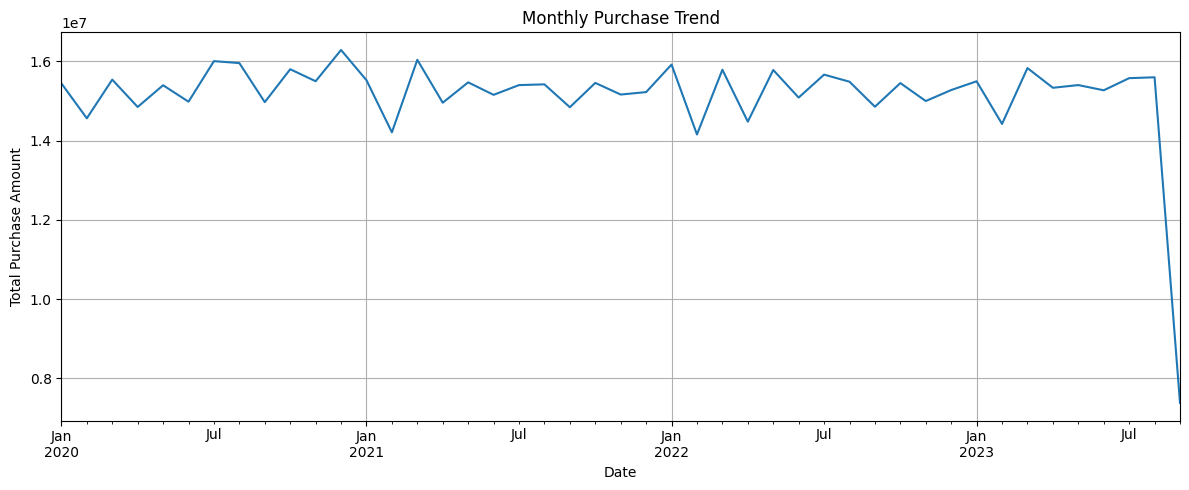

<Figure size 800x500 with 0 Axes>

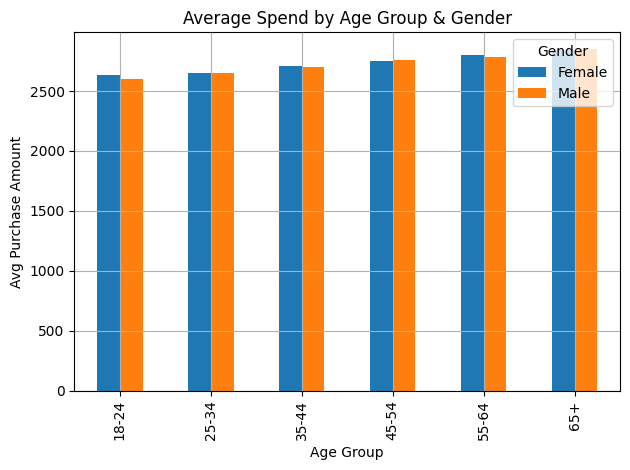

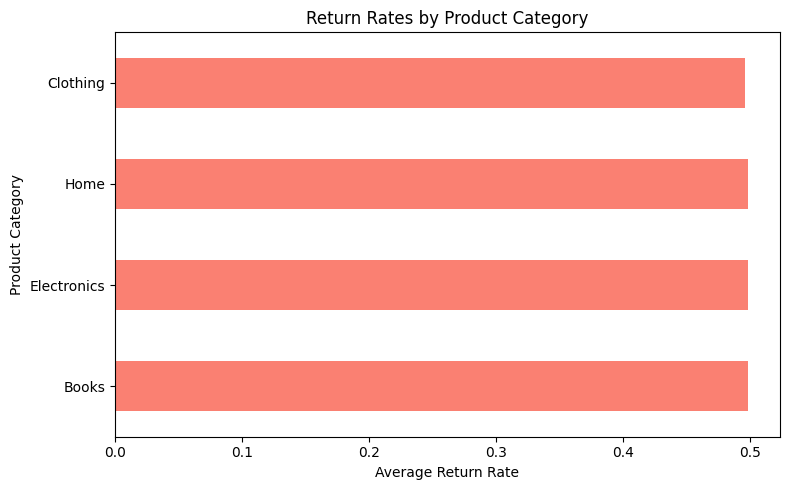

/tmp/ipython-input-3-3680933085.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary.reset_index(), x='Total Purchase Amount', y='Product Category', palette='viridis')


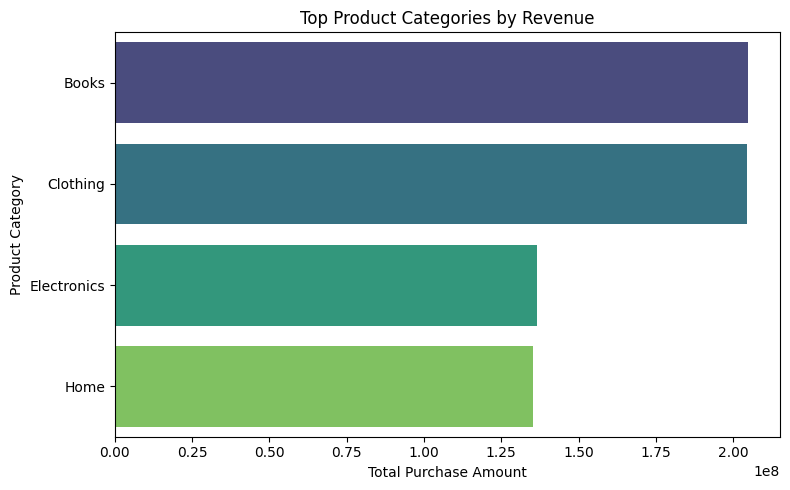

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

# Convert purchase date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Clean and prepare data
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100],
                         labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], right=False)

# 1. Top Product Categories by Revenue and Purchase Count
category_summary = df.groupby('Product Category').agg({
    'Total Purchase Amount': 'sum',
    'Product Price': 'count'
}).rename(columns={'Product Price': 'Number of Purchases'}).sort_values(by='Total Purchase Amount', ascending=False)
print("\nTop Product Categories:\n", category_summary)

# 2. Average Spend per Customer
avg_spend = df.groupby('Customer ID')['Total Purchase Amount'].sum().mean()
print(f"\nAverage Spend per Customer: ₹{avg_spend:.2f}")

# 3. Churn Rate
churn_rate = df.drop_duplicates('Customer ID')['Churn'].mean()
print(f"\nChurn Rate: {churn_rate * 100:.2f}%")

# 4. Spending by Age Group and Gender
age_gender_spending = df.groupby(['Age Group', 'Gender'])['Total Purchase Amount'].mean().unstack()
print("\nAverage Spend by Age Group and Gender:\n", age_gender_spending)

# 5. Return Rates by Product Category
return_rate = df.groupby('Product Category')['Returns'].mean().sort_values(ascending=False)
print("\nReturn Rates by Category:\n", return_rate)

# 6. Monthly Purchase Trend
monthly_trend = df.groupby([df['Purchase Date'].dt.to_period("M")])['Total Purchase Amount'].sum()
monthly_trend.index = monthly_trend.index.to_timestamp()

# Revenue Trend
plt.figure(figsize=(12, 5))
monthly_trend.plot()
plt.title("Monthly Purchase Trend")
plt.ylabel("Total Purchase Amount")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

# Spending by Age Group & Gender
plt.figure(figsize=(8, 5))
age_gender_spending.plot(kind='bar')
plt.title("Average Spend by Age Group & Gender")
plt.ylabel("Avg Purchase Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

# Return Rate by Category
plt.figure(figsize=(8, 5))
return_rate.plot(kind='barh', color='salmon')
plt.title("Return Rates by Product Category")
plt.xlabel("Average Return Rate")
plt.tight_layout()
plt.show()

# Category-wise Revenue
plt.figure(figsize=(8, 5))
sns.barplot(data=category_summary.reset_index(), x='Total Purchase Amount', y='Product Category', palette='viridis')
plt.title("Top Product Categories by Revenue")
plt.xlabel("Total Purchase Amount")
plt.tight_layout()
plt.show()
